In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df = df.reset_index(drop=True)

In [4]:
df["id"] = range(len(df))

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,1,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,2,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,3,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,4,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [6]:
df.shape

(16209, 21)

In [7]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,16209.000000,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,8104.000000,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,4679.279592,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,0.000000,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,4052.000000,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,8104.000000,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,12156.000000,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,16208.000000,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

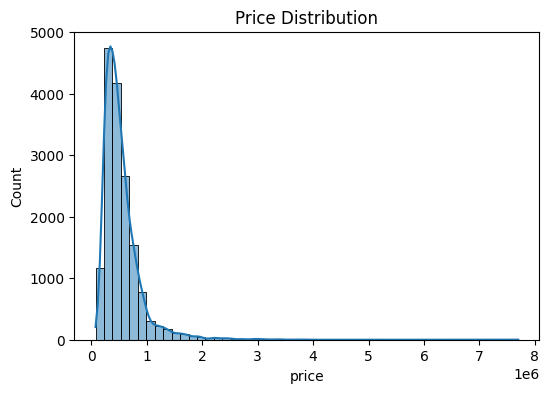

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

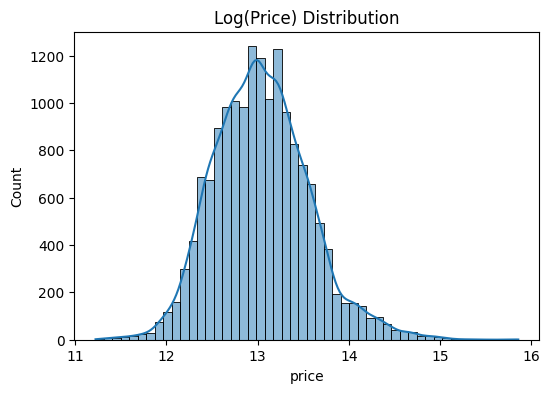

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["price"]), bins=50, kde=True)
plt.title("Log(Price) Distribution")
plt.show()

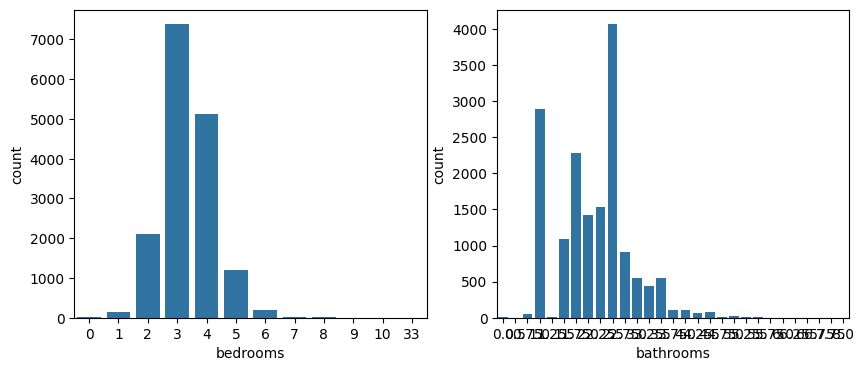

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(x="bedrooms", data=df, ax=ax[0])
sns.countplot(x="bathrooms", data=df, ax=ax[1])
plt.show()

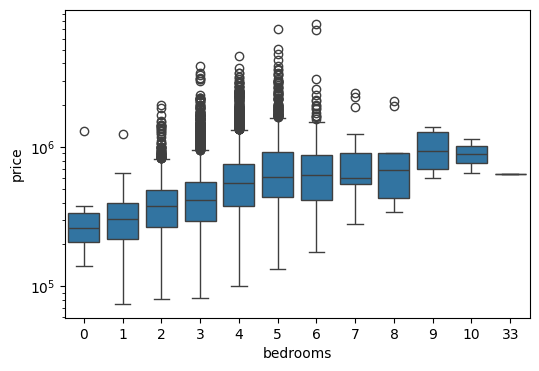

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.yscale("log")
plt.show()

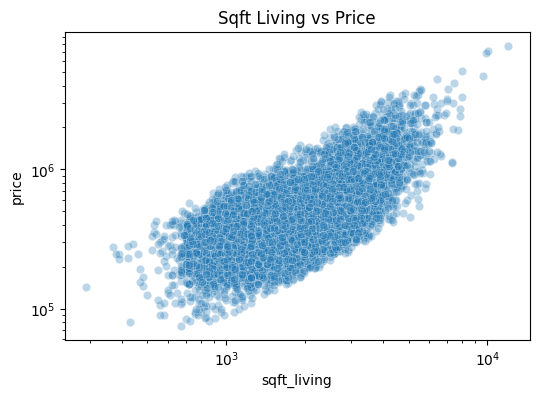

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="sqft_living",
    y="price",
    data=df,
    alpha=0.3
)
plt.xscale("log")
plt.yscale("log")
plt.title("Sqft Living vs Price")
plt.show()

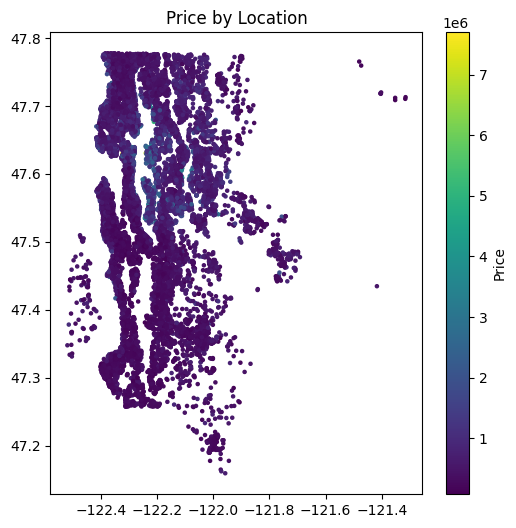

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(
    df["long"],
    df["lat"],
    c=df["price"],
    cmap="viridis",
    s=5
)
plt.colorbar(label="Price")
plt.title("Price by Location")
plt.show()

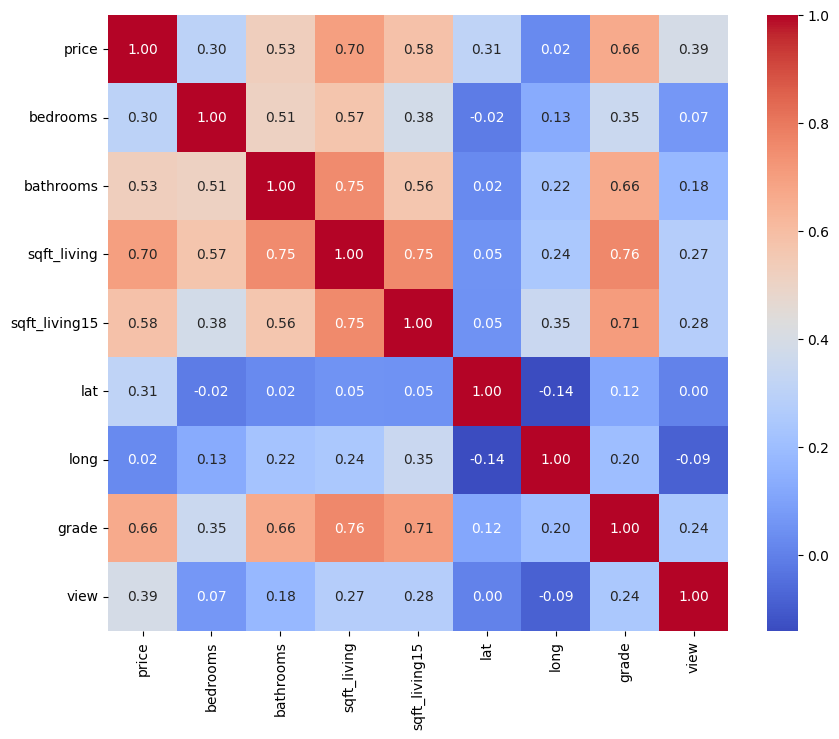

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[
        ["price","bedrooms","bathrooms","sqft_living",
         "sqft_living15","lat","long","grade","view"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.show()


**Feature Engineering**

In [17]:
df["living_ratio"] = df["sqft_living"] / (df["sqft_living15"] + 1)
df["lot_ratio"] = df["sqft_lot"] / (df["sqft_lot15"] + 1)

In [18]:
df["basement_flag"] = (df["sqft_basement"] > 0).astype(int)
df["basement_frac"] = df["sqft_basement"] / (df["sqft_living"] + 1)


In [19]:
df["house_age"] = 2025 - df["yr_built"]
df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)

In [20]:
from sklearn.cluster import KMeans

coords = df[["lat", "long"]]
df["geo_cluster"] = KMeans(n_clusters=30, random_state=42).fit_predict(coords)


In [21]:
features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_above",
    "sqft_basement",
    "floors",
    "grade",
    "condition",
    "yr_built",
    "house_age",          
    "basement_flag",      # sqft_basement > 0
    "basement_frac",      # sqft_basement / sqft_living,
    "sqft_living15",
    "sqft_lot15",
    "living_ratio",   # sqft_living / sqft_living15
    "lot_ratio" ,
    "view",
    "waterfront",
    "geo_cluster"
]


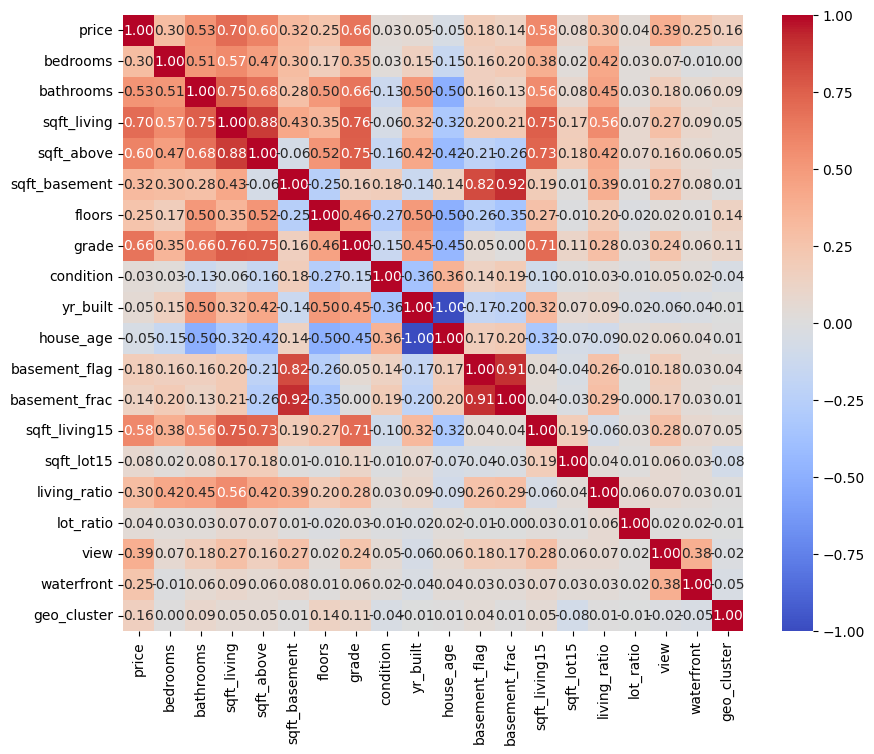

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[['price', "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_above",
    "sqft_basement",
    "floors",
    "grade",
    "condition",
    "yr_built",
    "house_age",          
    "basement_flag",      # sqft_basement > 0
    "basement_frac",      # sqft_basement / sqft_living,
    "sqft_living15",
    "sqft_lot15",
    "living_ratio",   # sqft_living / sqft_living15
    "lot_ratio" ,
    "view",
    "waterfront",
    "geo_cluster"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.show()

**Model on only tabular data**

In [23]:
X = df[features]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

y = df['price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [25]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

lgb_model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

lgb_model.fit(X_train, y_train)

val_preds = lgb_model.predict(X_val)

mse = mean_squared_error(y_val, val_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, val_preds)

print(f"LightGBM RMSE: {rmse:.4f}")
print(f"LightGBM R²: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2321
[LightGBM] [Info] Number of data points in the train set: 12967, number of used features: 19
[LightGBM] [Info] Start training from score 536803.990283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\amitj\anaconda3\envs\cdc-satellite\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


**Tabular-only LightGBM Model with R2 score : 0.8588**

In [26]:
df["lgb_pred"] = lgb_model.predict(X)
df["residuals"] = df["price"] - df["lgb_pred"]

C:\Users\amitj\anaconda3\envs\cdc-satellite\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Saving the residuals to train the tabular + image model on, we will only use image data where our tabular model is not performing good, where the residuals are large.

In [27]:
import pickle

with open("lgb_tabular_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)


In [28]:
df.to_csv("df_with_residuals.csv", index=False)